In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras import layers, models, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


## Load Data

In [23]:
base_dir = "/kaggle/input/fer2013"
img_size = (48, 48)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    os.path.join(base_dir, "train"),
    target_size=img_size,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    os.path.join(base_dir, "test"),
    target_size=img_size,
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Build and train CNN (Functional API)

In [24]:
# Functional model
input_layer = Input(shape=(48, 48, 1))
x = layers.Conv2D(64, (3, 3), activation='relu')(input_layer)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2, 2)(x)
x = layers.Flatten()(x)
features = layers.Dense(128, activation='relu', name='feature_layer')(x)
output = layers.Dense(7, activation='softmax')(features)

cnn = Model(inputs=input_layer, outputs=output)

cnn.compile(optimizer=Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])

cnn.fit(train_gen, validation_data=val_gen, epochs=10)


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 64s 69ms/step - accuracy: 0.3163 - loss: 1.7019 - val_accuracy: 0.4333 - val_loss: 1.4768
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 64s 71ms/step - accuracy: 0.4569 - loss: 1.4200 - val_accuracy: 0.4756 - val_loss: 1.3634
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 60s 67ms/step - accuracy: 0.5058 - loss: 1.3051 - val_accuracy: 0.4990 - val_loss: 1.3038
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 59s 66ms/step - accuracy: 0.5345 - loss: 1.2273 - val_accuracy: 0.4989 - val_loss: 1.3128
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 62s 69ms/step - accuracy: 0.5745 - loss: 1.1410 - val_accuracy: 0.5219 - val_loss: 1.2546
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 64s 71ms/step - accuracy: 0.6108 - loss: 1.0605 - val_accuracy: 0.5326 - val_loss: 1.2397
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 62s 69ms/step - accuracy: 0.6470 - loss: 0.9685 - val_accuracy: 0.5436 - val_loss: 1.2492
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 67s 74ms/step - accuracy: 0.6814 - loss: 0.8742 - 

## Build Feature Extractor

In [25]:
feature_model = Model(inputs=cnn.input, outputs=cnn.get_layer("feature_layer").output)


# Extract Feature

In [26]:
X, y = [], []

for i in range(len(val_gen)):
    x_batch, y_batch = val_gen[i]
    feat = feature_model.predict(x_batch)
    X.append(feat)
    y.append(np.argmax(y_batch, axis=1))

X = np.vstack(X)
y = np.hstack(y)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

# Train and Evaluate SVM

SVM Accuracy: 74.51%
              precision    recall  f1-score   support

       angry       0.73      0.65      0.69       958
     disgust       0.93      0.60      0.73       111
        fear       0.76      0.57      0.65      1024
       happy       0.82      0.90      0.86      1774
     neutral       0.70      0.71      0.71      1233
         sad       0.60      0.72      0.65      1247
    surprise       0.87      0.85      0.86       831

    accuracy                           0.75      7178
   macro avg       0.77      0.71      0.74      7178
weighted avg       0.75      0.75      0.74      7178



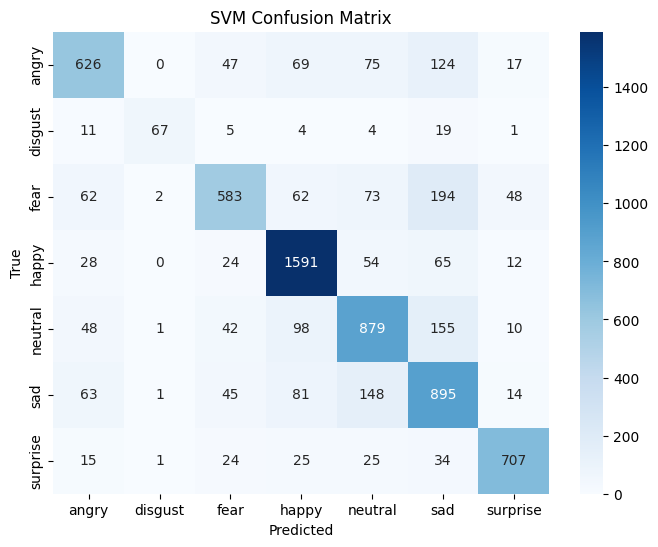

In [27]:
svm = SVC(kernel='rbf', C=10, gamma='scale')
svm.fit(X, y)

y_pred = svm.predict(X)

# Report
print(f"SVM Accuracy: {accuracy_score(y, y_pred) * 100:.2f}%")
print(classification_report(y, y_pred, target_names=val_gen.class_indices.keys()))

# Confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=val_gen.class_indices.keys(),
            yticklabels=val_gen.class_indices.keys())
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [28]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y, y_pred)
print(f"SVM Accuracy on Validation Set: {acc*100:.2f}%")


SVM Accuracy on Validation Set: 74.51%


# Predict

In [29]:
import cv2
import numpy as np

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def predict_emotion(image_path, feature_model, svm_model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48))
    img = img / 255.0
    img = np.expand_dims(img, axis=(0, -1))  # (1, 48, 48, 1)

    features = feature_model.predict(img)
    pred_label = svm_model.predict(features)[0]
    
    return emotion_labels[pred_label]


In [31]:
emotion = predict_emotion("/kaggle/input/myimage/anger.jpg", feature_model, svm)
print("Predicted Emotion:", emotion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Predicted Emotion: Fear


# Save CNN Model

In [32]:
# Save full CNN model (used for feature extraction)
cnn.save("cnn_svm_FER_model.h5")


# Save SVM Model

In [33]:
import joblib

# Save the SVM classifier
joblib.dump(svm, "svm_model.pkl")


['svm_model.pkl']